In [26]:
# mount google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Extract dataset from zip file
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/daataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/data')
zip_ref.close()

In [28]:
# importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [29]:
# Reading the training and test CSV files
train = pd.read_csv('/data/sign_mnist_train.csv')
test = pd.read_csv('/data/sign_mnist_test.csv')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [31]:
# check the shape of the training and test data that we have read above
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [32]:
# checking the training data to verify class labels and columns representing pixels
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [33]:
train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [34]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [35]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [36]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

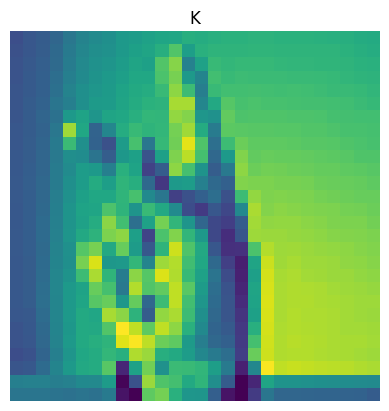

In [37]:
#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

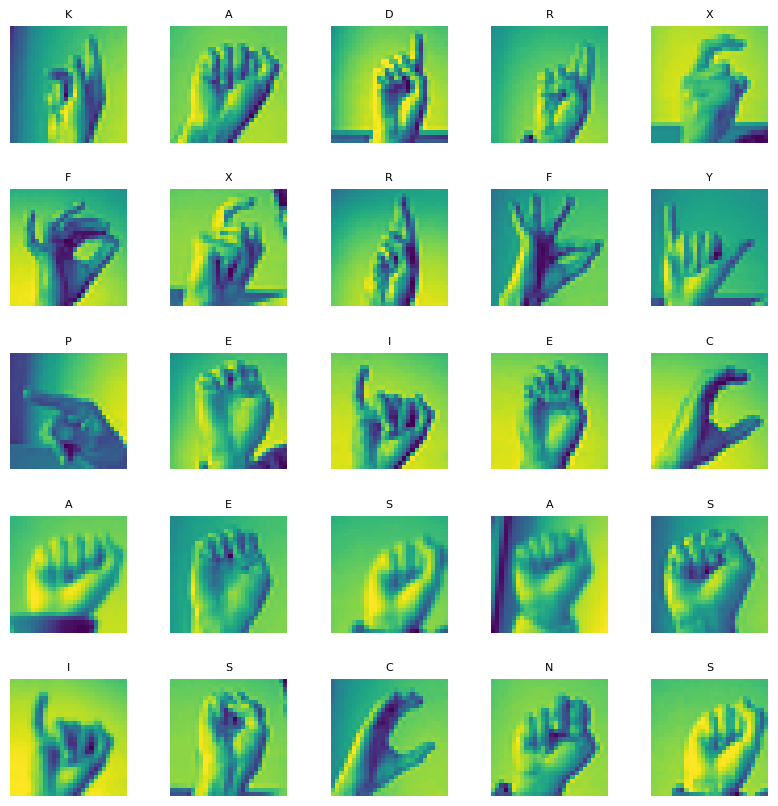

In [38]:
# ploting some random images from the training set with their class labels
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## **Preprocessing Datasets**

In [39]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255 # Normailze the RGB codes by dividing it to the max RGB value 
y_train = train_set[:, 0]
X_test = test_set[:, 1:] / 255 # Normailze the RGB codes by dividing it to the max RGB value 
y_test = test_set[:,0]

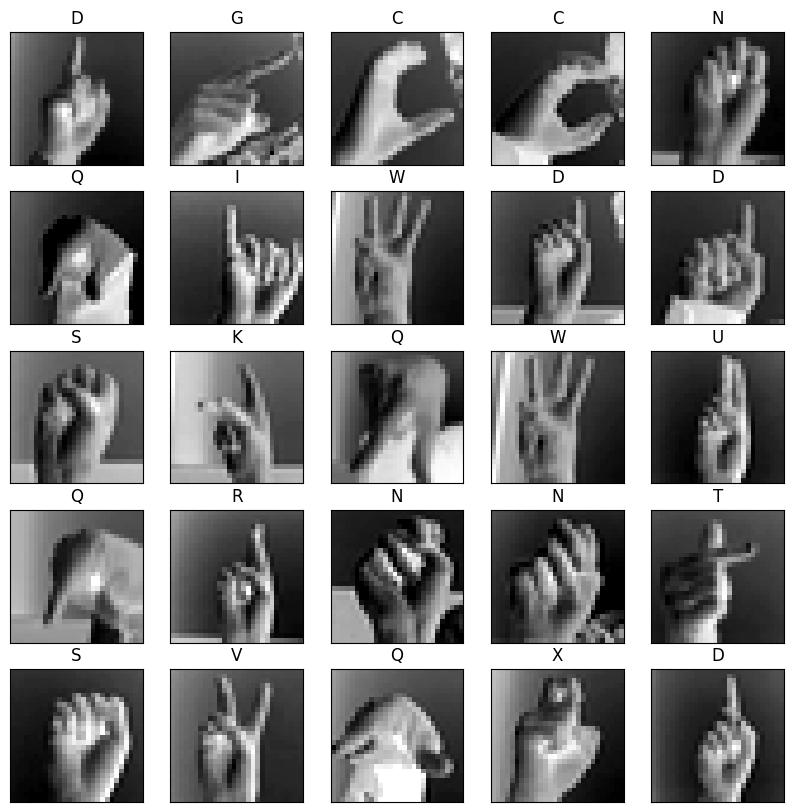

In [40]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary) 
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [ ]:
# Frequency plot of the labels
# import seaborn as sns
# sns.countplot(train['label'])
# plt.title("Frequency of each label")

Spiltting into train and test data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [42]:
# check the shape of the training data set.

print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [43]:
# Unpack the training and test tuple
# Reshaping the array
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


# **Convolutional Neural Network**





In [44]:
#Library for CNN Model
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [46]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [47]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [48]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 7s 24ms/step - loss: 3.1875 - accuracy: 0.0437 - val_loss: 3.1987 - val_accuracy: 0.0479
Epoch 2/50
43/43 [==============================] - 1s 17ms/step - loss: 3.0108 - accuracy: 0.0744 - val_loss: 2.7533 - val_accuracy: 0.1054
Epoch 3/50
43/43 [==============================] - 1s 17ms/step - loss: 2.6385 - accuracy: 0.1217 - val_loss: 2.3774 - val_accuracy: 0.1799
Epoch 4/50
43/43 [==============================] - 1s 17ms/step - loss: 2.3350 - accuracy: 0.1747 - val_loss: 2.1044 - val_accuracy: 0.2094
Epoch 5/50
43/43 [==============================] - 1s 16ms/step - loss: 2.0185 - accuracy: 0.2342 - val_loss: 1.7080 - val_accuracy: 0.3274
Epoch 6/50
43/43 [==============================] - 1s 17ms/step - loss: 1.7187 - accuracy: 0.3180 - val_loss: 1.3808 - val_accuracy: 0.4007
Epoch 7/50
43/43 [==============================] - 1s 17ms/step - loss: 1.4748 - accuracy: 0.3957 - val_loss: 1.1563 - val_accuracy: 0.5101
Epoch 8/50
43

In [49]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 7s 26ms/step - loss: 0.0843 - accuracy: 0.9793 - val_loss: 0.0025 - val_accuracy: 0.9998
Epoch 2/50
43/43 [==============================] - 1s 20ms/step - loss: 0.0633 - accuracy: 0.9850 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 1s 20ms/step - loss: 0.0557 - accuracy: 0.9864 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/50
43/43 [==============================] - 1s 19ms/step - loss: 0.0580 - accuracy: 0.9873 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 1s 21ms/step - loss: 0.0480 - accuracy: 0.9884 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0469 - accuracy: 0.9883 - val_loss: 9.7808e-04 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0497 - accuracy: 0.9880 - val_loss: 6.3209e-04 - val_accuracy: 1.0000
Epoch

In [53]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 5s 24ms/step - loss: 0.0360 - accuracy: 0.9925 - val_loss: 2.4459e-04 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0293 - accuracy: 0.9935 - val_loss: 4.8500e-04 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0307 - accuracy: 0.9934 - val_loss: 9.9090e-04 - val_accuracy: 0.9996
Epoch 4/50
43/43 [==============================] - 1s 20ms/step - loss: 0.0359 - accuracy: 0.9921 - val_loss: 1.5054e-04 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 1s 20ms/step - loss: 0.0353 - accuracy: 0.9921 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 1s 20ms/step - loss: 0.0296 - accuracy: 0.9938 - val_loss: 1.5076e-04 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 1s 20ms/step - loss: 0.0264 - accuracy: 0.9941 - val_loss: 1.0787e-04 - val_accura

In [54]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 7s 24ms/step - loss: 0.0311 - accuracy: 0.9939 - val_loss: 1.4750e-04 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0183 - accuracy: 0.9964 - val_loss: 5.2747e-05 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0176 - accuracy: 0.9959 - val_loss: 5.4608e-05 - val_accuracy: 1.0000
Epoch 4/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0180 - accuracy: 0.9960 - val_loss: 3.3280e-05 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0270 - accuracy: 0.9945 - val_loss: 4.1936e-04 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0244 - accuracy: 0.9947 - val_loss: 4.4638e-05 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0182 - accuracy: 0.9959 - val_loss: 3.9589e-05 - val_ac

In [58]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 6s 29ms/step - loss: 0.0183 - accuracy: 0.9964 - val_loss: 6.5200e-05 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 1s 19ms/step - loss: 0.0167 - accuracy: 0.9965 - val_loss: 4.7274e-05 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 1s 19ms/step - loss: 0.0183 - accuracy: 0.9965 - val_loss: 4.4014e-05 - val_accuracy: 1.0000
Epoch 4/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0105 - accuracy: 0.9980 - val_loss: 8.0149e-06 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0216 - accuracy: 0.9964 - val_loss: 8.5299e-05 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0118 - accuracy: 0.9975 - val_loss: 9.3427e-06 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0100 - accuracy: 0.9978 - val_loss: 5.4025e-06 - val_ac

In [62]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 5s 24ms/step - loss: 0.0162 - accuracy: 0.9969 - val_loss: 2.2786e-05 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0198 - accuracy: 0.9967 - val_loss: 9.8006e-05 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 1s 16ms/step - loss: 0.0166 - accuracy: 0.9964 - val_loss: 3.5402e-05 - val_accuracy: 1.0000
Epoch 4/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0189 - accuracy: 0.9969 - val_loss: 9.6308e-05 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0141 - accuracy: 0.9972 - val_loss: 9.6495e-06 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0163 - accuracy: 0.9966 - val_loss: 1.2786e-05 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0196 - accuracy: 0.9962 - val_loss: 9.5148e-06 - val_ac

In [66]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 6s 24ms/step - loss: 0.0150 - accuracy: 0.9973 - val_loss: 6.3525e-06 - val_accuracy: 1.0000
Epoch 2/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0131 - accuracy: 0.9975 - val_loss: 7.7536e-06 - val_accuracy: 1.0000
Epoch 3/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0160 - accuracy: 0.9973 - val_loss: 4.9733e-05 - val_accuracy: 1.0000
Epoch 4/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0175 - accuracy: 0.9970 - val_loss: 1.3929e-04 - val_accuracy: 1.0000
Epoch 5/50
43/43 [==============================] - 1s 18ms/step - loss: 0.0163 - accuracy: 0.9972 - val_loss: 4.5052e-06 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 1s 17ms/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 2.1342e-06 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 1s 22ms/step - loss: 0.0128 - accuracy: 0.9976 - val_loss: 1.0552e-04 - val_ac

Text(0.5, 1.0, 'Accuracy evolution')

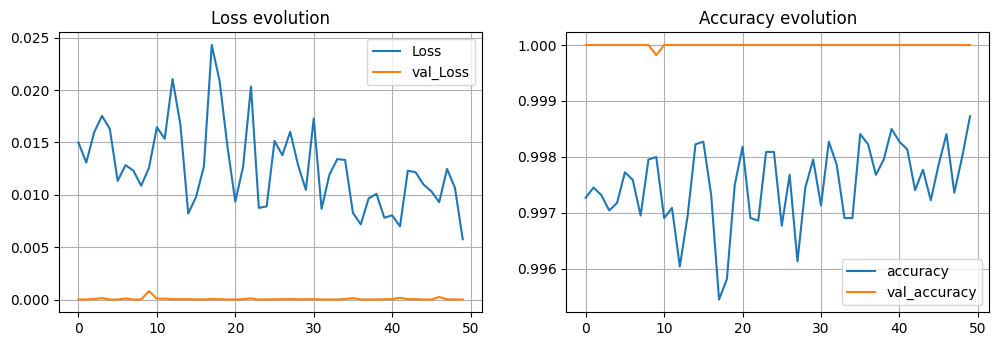

In [67]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [68]:
#Predictions for the test data
(ls,acc)=cnn_model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 1s 3ms/step - loss: 0.1940 - accuracy: 0.9769


In [69]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 97.68544435501099%


In [ ]:
# cnn_model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 148ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# np.argmax(cnn_model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 19ms/step


6

In [ ]:
# y_test[0]

6.0

In [ ]:
# y_pred=cnn_model.predict(X_test).round(2)
# y_pred

225/225 [==============================] - 0s 2ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

# (ls,acc)=cnn_model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 1s 3ms/step - loss: 0.2032 - accuracy: 0.9667


In [ ]:
# plt.figure(figsize=(16, 30))
# j=1
# for i in np.random.randint(0,1000,60):
#     plt.subplot(10, 6, j);j+=1
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i].reshape((28,28)), cmap='Greys') 
#     # label_index = int(y_train[i])
#     plt.axis('off')
#     plt.title('Actual= {} / {} \nPredi= {} / {}'.format(class_names[int(y_test[i])],int(y_test[i]),class_names[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
# plt.show()

In [ ]:
# Create function to match label to letter
# def getLetter(result):
#     classLabels = { 0: 'A',
#                     1: 'B',
#                     2: 'C',
#                     3: 'D',
#                     4: 'E',
#                     5: 'F',
#                     6: 'G',
#                     7: 'H',
#                     8: 'I',
#                     9: 'K',
    #                 10: 'L',
    #                 11: 'M',
    #                 12: 'N',
    #                 13: 'O',
    #                 14: 'P',
    #                 15: 'Q',
    #                 16: 'R',
    #                 17: 'S',
    #                 18: 'T',
    #                 19: 'U',
    #                 20: 'V',
    #                 21: 'W',
    #                 22: 'X',
    #                 23: 'Y'}
    # try:
    #     res = int(result)
    #     return classLabels[res]
    # except:
    #     return "Error"

In [ ]:
# Drop Training Labels from our training data so we can separate it 
# train.drop('label', axis = 1, inplace = True)

In [ ]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
# images = train.values
# images = np.array([np.reshape(i, (28, 28)) for i in images])
# images = np.array([i.flatten() for i in images])

In [ ]:
# from google.colab.patches import cv2_imshow

In [ ]:
# Use OpenCV to view 10 random images from our training data
# import cv2
# import numpy as np

# for i in range(0,10):
#     rand = np.random.randint(0, len(images))
#     input_im = images[rand]

#     sample = input_im.reshape(28,28).astype(np.uint8)
#     # train_set[i,1:].reshape((28,28))
#     sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
#     cv2_imshow(sample)
#     cv2.waitKey(0) 
    
# cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#   print ("Could not open cam")
#   exit()

# while True:

    # ret, frame = cap.read()
    
    ##############################
    
    # frame=cv2.flip(frame, 1)
    
    # #define region of interest
    # roi = frame[100:400, 200:500]
    # cv2.imshow('roi', roi)
    # roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    # cv2.imshow('roi sacled and gray', roi)
    # copy = frame.copy()
    # cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    # roi = roi.reshape(1,28,28,1) 

    # result = str(cnn_model.predict_classes(roi, 1, verbose = 0)[0])
    # cv2.putText(copy, getLetter(result), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    # cv2.imshow('frame', copy)    
    
#     if cv2.waitKey(1) == 13:    #13 is the Enter Key
#         break
        
# cap.release()
# cv2.destroyAllWindows() 

In [70]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!pip install google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.5 MB/s eta 0:00:00


In [72]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
cnn_model.save('CNNmodel.h5')

In [73]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [74]:
cn = 'CNNmodel.h5'
file = drive.CreateFile({'title': 'cn'})
file.SetContentFile(cn)
file.Upload()

file.get('id')
# print("Model uploaded with file ID:", file_id)

'1ISLrxAfxNk3dB3VqLqN87pk9Nn0ytms6'

In [75]:
import cv2
def main():
    while True:  

       # capturing the image from webcam 
       cam_capture = cv2.VideoCapture(0)
       _, image_frame = cam_capture.read()
  
       # to crop required part
       im2 = crop_image(image_frame, 300,300,300,300)

       # convert to grayscale 
       image_grayscale = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    
       # blurring the image 
       image_grayscale_blurred =cv2.GaussianBlur(image_grayscale, (15,15), 0)

       # resize the image to 28x28
       im3 = cv2.resize(image_grayscale_blurred, (28,28), interpolation = cv2.INTER_AREA)

       # expand the dimensions from 28x28 to 1x28x28x1
       im4 = np.resize(im3, (28, 28, 1))
       im5 = np.expand_dims(im4, axis=0)

In [76]:
#model is our classifier and image is input image we are passing
def keras_predict(model, image):
    data = np.asarray( image, dtype="int32" )
    pred_probab = model.predict(data)[0]
    
    # softmax gives probability for all the alphabets hence we have to choose the maximum probability alphabet 
    pred_class = list(pred_probab).index(max(pred_probab))
    return max(pred_probab), pred_class

In [77]:
!pip install h5py pyyaml 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
